In [2]:
import pandas as pd
import numpy as np
import os
import glob
import sqlite3
import seaborn as sns

In [4]:
df = pd.read_excel('esercizio1.xlsx')
df

,Nome,Cognome,Età
0,Pietro,Rossi,22
1,Mario,Verdi,12
2,Giuseppe,Blu,44
3,Franco,Bianchi,45
4,Marco,Viola,88
5,Filippo,Fini,17


In [5]:
df['Età'].apply(lambda x: x * 2)

0     44
1     24
2     88
3     90
4    176
5     34
Name: Età, dtype: int64

In [6]:
df

,Nome,Cognome,Età
0,Pietro,Rossi,22
1,Mario,Verdi,12
2,Giuseppe,Blu,44
3,Franco,Bianchi,45
4,Marco,Viola,88
5,Filippo,Fini,17


In [8]:
df['Maggiorenne']=df['Età'].apply(lambda x: 'yes' if x>=18 else 'no')

In [9]:
df

,Nome,Cognome,Età,Maggiorenne
0,Pietro,Rossi,22,yes
1,Mario,Verdi,12,no
2,Giuseppe,Blu,44,yes
3,Franco,Bianchi,45,yes
4,Marco,Viola,88,yes
5,Filippo,Fini,17,no


In [10]:
df['doubleEta']=df['Età'].apply(lambda x: x*2)

In [11]:
df

,Nome,Cognome,Età,Maggiorenne,doubleEta
0,Pietro,Rossi,22,yes,44
1,Mario,Verdi,12,no,24
2,Giuseppe,Blu,44,yes,88
3,Franco,Bianchi,45,yes,90
4,Marco,Viola,88,yes,176
5,Filippo,Fini,17,no,34


In [12]:
df['TripleEta']=df.apply(lambda x: x[2]+x[4], axis=1)

In [13]:
df

,Nome,Cognome,Età,Maggiorenne,doubleEta,TripleEta
0,Pietro,Rossi,22,yes,44,66
1,Mario,Verdi,12,no,24,36
2,Giuseppe,Blu,44,yes,88,132
3,Franco,Bianchi,45,yes,90,135
4,Marco,Viola,88,yes,176,264
5,Filippo,Fini,17,no,34,51


In [14]:
df.to_excel('esercizio2.xlsx', index=False)

In [15]:
doubleEta = df['doubleEta']
doubleEta

0     44
1     24
2     88
3     90
4    176
5     34
Name: doubleEta, dtype: int64

In [16]:
lower_limit, upper_limit = np.percentile(a=doubleEta, q=[0.5,99.5])
print(upper_limit)
print(lower_limit)

173.84999999999997
24.25


In [17]:
mu, sigma = 60 , 12
s = np.random.normal(mu, sigma, 1000)
s

array([ 64.2703479 ,  54.61084591,  60.57610295,  72.13412413,
        44.89922751,  53.60362519,  66.2074553 ,  79.60175134,
        67.81576097,  57.1238616 ,  58.52022792,  66.34409184,
        36.93113424,  47.1388289 ,  84.6354226 ,  93.32663026,
        39.30894145,  74.06039992,  50.31220722,  52.30486948,
        48.12784662,  69.35039179,  62.50235602,  48.95468836,
        41.14258829,  80.27520008,  54.50531295,  80.70672995,
        44.77049002,  54.33163906,  58.3007526 ,  32.48773533,
        70.80969467,  92.65252693,  75.7755219 ,  59.08614779,
        52.42624111,  51.13136252,  47.22195897,  56.48585568,
        40.80754968,  46.70309257,  74.68356757,  61.6575524 ,
        69.82008458,  54.79039421,  70.0470561 ,  77.91617831,
        53.94040036,  64.17063   ,  65.87719153,  76.2543715 ,
        83.4685415 ,  65.99542704,  74.34982421,  64.31241316,
        58.99704402,  66.96532003,  53.43030705,  58.2973631 ,
        61.09827292,  82.66464685,  56.31923383,  60.71

In [18]:
df=pd.DataFrame(s,columns=['scores'])

In [23]:
lower_limit, upper_limit = np.percentile(a=s, q=[0.50,77])
print(upper_limit)
print(lower_limit)

68.97534818325876
31.65239750162231


In [24]:
df_filtered = df[(df['scores']>lower_limit) & (df['scores']<upper_limit)]
print(df_filtered)

        scores
0    64.270348
1    54.610846
2    60.576103
4    44.899228
5    53.603625
..         ...
994  67.657330
995  66.427513
997  48.616637
998  62.732220
999  42.285557

[765 rows x 1 columns]


In [25]:
df_filtered.reset_index(drop=True, inplace=True)
df_filtered

,scores
0,64.270348
1,54.610846
2,60.576103
3,44.899228
4,53.603625
...,...
760,67.657330
761,66.427513
762,48.616637
763,62.732220


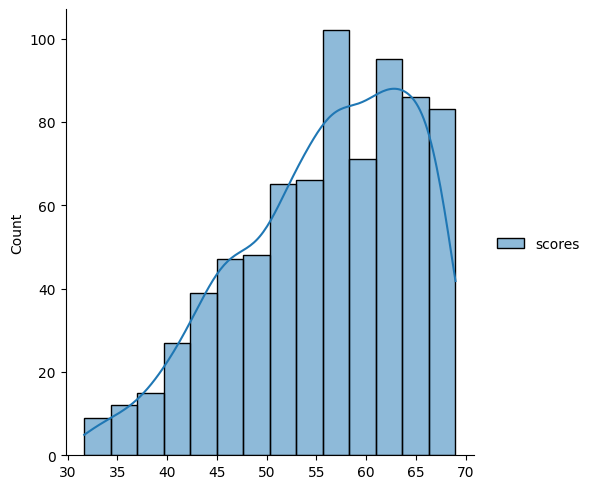

In [27]:
sns.displot(df_filtered, kde=True)

In [79]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   scores  500 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [29]:
df_filtered.corr()

,scores
scores,1.0


<AxesSubplot:>

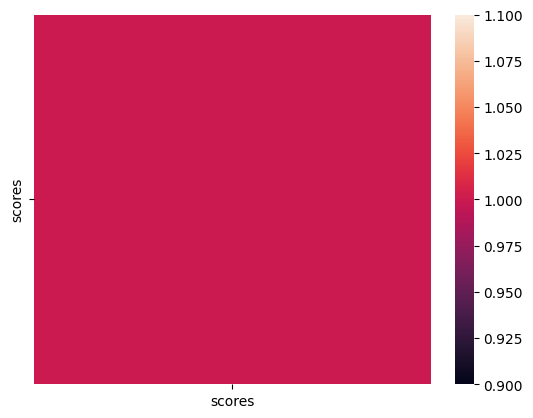

In [33]:
sns.heatmap(df_filtered.corr())